### Exploratory Analysis of Data Breaches in the United States

#### Resources
- [Show all row and columns settings](https://towardsdatascience.com/how-to-show-all-columns-rows-of-a-pandas-dataframe-c49d4507fcf)

#### TODO:
1. Tranform column data into row data
2. Import vcdb schema as a pandas dataframe to look up questions related to specific fields ex. schema_df.loc['data_field']

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import os

In [9]:
# Additional Options
# set the plots to display in the Jupyter notebook
%matplotlib inline

# change plotting colors per client request
plt.style.use('ggplot')

# Increase default figure and font sizes for easier viewing.
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 14

In [ ]:
# pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [11]:
# Using csv file
df = pd.read_csv('./data/vcdb_csv_source.csv', low_memory=False)
df.head()

action.environmental.notes  action.environmental.variety.Deterioration  \
0                        NaN                                       False   
1                        NaN                                       False   
2                        NaN                                       False   
3                        NaN                                       False   
4                        NaN                                       False   

   action.environmental.variety.Earthquake  action.environmental.variety.EMI  \
0                                    False                             False   
1                                    False                             False   
2                                    False                             False   
3                                    False                             False   
4                                    False                             False   

   action.environmental.variety.ESD  action.environmental.variety.Fire  \
0                             False                              False   
1                             False                              False   
2                             False                              False   
3                             False                              False   
4                             False                              False   

   action.environmental.variety.Flood  action.environmental.variety.Hazmat  \
0                               False                                False   
1                               False                                False   
2                               False                                False   
3                               False                                False   
4                               False                                False   

   action.environmental.variety.Humidity  \
0                                  False   
1                                  False   
2                                  False   
3                                  False   
4                                  False   

   action.environmental.variety.Hurricane  action.environmental.variety.Ice  \
0                                   False                             False   
1                                   False                             False   
2                                   False                             False   
3                                   False                             False   
4                                   False                             False   

   action.environmental.variety.Landslide  action.environmental.variety.Leak  \
0                                   False                              False   
1                                   False                              False   
2                                   False                              False   
3                                   False                              False   
4                                   False                              False   

   action.environmental.variety.Lightning  \
0                                   False   
1                                   False   
2                                   False   
3                                   False   
4                                   False   

   action.environmental.variety.Meteorite  action.environmental.variety.Other  \
0                                   False                               False   
1                                   False                               False   
2                                   False                               False   
3                                   False                               False   
4                                   False                               False   

   action.environmental.variety.Particulates  \
0                                      False   
1                                      False   
2                          

In [4]:
df.shape

(9046, 2550)

### Steps to take in EDA
1. Assess Missing Values
2. Assess Numerical Variable
3. Distribution of the Numerical Variable
4. Assess Categorical Variables
5. Cardinality of Categorical Variables (What that mean???)
6. Outliers
7. Relationship between independent and dependent features against the outcome of a data breach and security incident)


In [ ]:
# Missing Values
# check percentage of nan values present in each feature
# create list of features which has missing values
features_with_nan = [features for features in df.columns if df[features].isnull().sum() > 1]

In [12]:
for col in df.columns:
    print(col)

SyntaxError: invalid syntax (Temp/ipykernel_22504/267146271.py, line 1)

In [5]:
# Incident and Breaches by Industry

display(df['victim.industry.name'].value_counts(normalize=True))
display(df['victim.industry.name'].count())


display(df['victim.victim_id'].value_counts().to_frame())
display(df['victim.victim_id'].count())


Healthcare         0.268516
Public             0.255251
Finance            0.087995
Information        0.082467
Educational        0.056379
Retail             0.051072
Professional       0.043445
Unknown            0.024983
Manufacturing      0.023767
Other Services     0.022662
Administrative     0.018793
Accomodation       0.017356
Transportation     0.011276
Trade              0.009618
Entertainment      0.008512
Real Estate        0.005306
Utilities          0.004422
Construction       0.003206
Mining             0.002764
Management         0.001658
Agriculture        0.000553
Name: victim.industry.name, dtype: float64

9046

victim.victim_id
United States Department of Veterans Affairs               873
Unknown                                                     73
US National Security Agency (NSA)                           14
Facebook                                                    12
7-Eleven                                                    12
...                                                        ...
Hotel Hippo                                                  1
Life Choices Community Health Services                       1
U.S. Sentencing Commission                                   1
PARK HILL SCHOOL DISTRICT                                    1
Awanui Rest Home                                             1

[6679 rows x 1 columns]

8737

In [24]:
df_us_total = df['plus.analysis_status.Finalized'] == True
df_us_total.value_counts()

False    7203
True     1843
Name: plus.analysis_status.Finalized, dtype: int64

In [11]:
df.describe()

actor.partner.industry  asset.assets.amount.E - Other  \
count              376.000000                            0.0   
mean            213329.457447                            NaN   
std             262175.606810                            NaN   
min                  0.000000                            NaN   
25%                  0.000000                            NaN   
50%                529.500000                            NaN   
75%             522542.500000                            NaN   
max             813410.000000                            NaN   

       asset.assets.amount.E - Telematics  asset.assets.amount.E - Telemetry  \
count                                 0.0                                0.0   
mean                                  NaN                                NaN   
std                                   NaN                                NaN   
min                                   NaN                                NaN   
25%                                   NaN                                NaN   
50%                                   NaN                                NaN   
75%                                   NaN                                NaN   
max                                   NaN                                NaN   

       asset.assets.amount.E - Unknown  asset.assets.amount.M - Disk drive  \
count                              0.0                           11.000000   
mean                               NaN                            1.909091   
std                                NaN                            2.385563   
min                                NaN                            1.000000   
25%                                NaN                            1.000000   
50%                                NaN                            1.000000   
75%                                NaN                            1.500000   
max                                NaN                            9.000000   

       asset.assets.amount.M - Disk media  asset.assets.amount.M - Documents  \
count                            8.000000                          80.000000   
mean                             1.250000                       13998.875000   
std                              0.707107                       89216.914969   
min                              1.000000                           1.000000   
25%                              1.000000                           1.000000   
50%                              1.000000                          45.500000   
75%                              1.000000                        1005.000000   
max                              3.000000                      780000.000000   

       asset.assets.amount.M - Fax  asset.assets.amount.M - Flash drive  \
count                          1.0                            14.000000   
mean                           1.0                             1.428571   
std                            NaN                             0.646206   
min                            1.0                             1.000000   
25%                            1.0                             1.000000   
50%                            1.0                             1.000000   
75%                            1.0                             2.000000   
max                            1.0                             3.000000   

       asset.assets.amount.M - Other  asset.assets.amount.M - Payment card  \
count                        4.00000                             18.000000   
mean                        33.50000                             84.944444   
std                         64.33506                            304.896216   
min                          1.00000                              1.000000   
25%                          1.00000                              1.000000   
50%                          1.50000                              1.000000   
75%                         34.00000                           

In [12]:
df.dtypes

action.environmental.notes                                                                             object
action.environmental.variety.Deterioration                                                               bool
action.environmental.variety.Earthquake                                                                  bool
action.environmental.variety.EMI                                                                         bool
action.environmental.variety.ESD                                                                         bool
action.environmental.variety.Fire                                                                        bool
action.environmental.variety.Flood                                                                       bool
action.environmental.variety.Hazmat                                                                      bool
action.environmental.variety.Humidity                                                                    bool
action.env

### Filtering and Cleaning Data
Scope:
- United States
- Incidents, Data Breaches, Near Miss and False Positives
- Finalized Records Only

In [27]:
df_us = df[(df['victim.country.US'] == True) & (df['plus.analysis_status.Finalized'] == True)]
df_us.head(15)


# Note: need to decide whether to use Finalized results (reviewed by person seeing all data) or those with at least one review.

action.environmental.notes  action.environmental.variety.Deterioration  \
19                         NaN                                       False   
20                         NaN                                       False   
22                         NaN                                       False   
25                         NaN                                       False   
29                         NaN                                       False   
51                         NaN                                       False   
54                         NaN                                       False   
64                         NaN                                       False   
87                         NaN                                       False   
102                        NaN                                       False   
118                        NaN                                       False   
122                        NaN                                       False   
123                        NaN                                       False   
124                        NaN                                       False   
131                        NaN                                       False   

     action.environmental.variety.Earthquake  \
19                                     False   
20                                     False   
22                                     False   
25                                     False   
29                                     False   
51                                     False   
54                                     False   
64                                     False   
87                                     False   
102                                    False   
118                                    False   
122                                    False   
123                                    False   
124                                    False   
131                                    False   

     action.environmental.variety.EMI  action.environmental.variety.ESD  \
19                              False                             False   
20                              False                             False   
22                              False                             False   
25                              False                             False   
29                              False                             False   
51                              False                             False   
54                              False                             False   
64                              False                             False   
87                              False                             False   
102                             False                             False   
118                             False                             False   
122                             False                             False   
123                             False                             False   
124                             False                             False   
131                             False                             False   

     action.environmental.variety.Fire  action.environmental.variety.Flood  \
19                               False                               False   
20                               False                               False   
22                               False                               False   
25                               False                               False   
29                               False                               False   
51                               False                               False   
54                               False                               False   
64                               False                               False   
87                               False                               False   
102  

In [26]:
df_us.shape

(6416, 2550)

Text(0, 0.5, 'Number of Recorded Events')

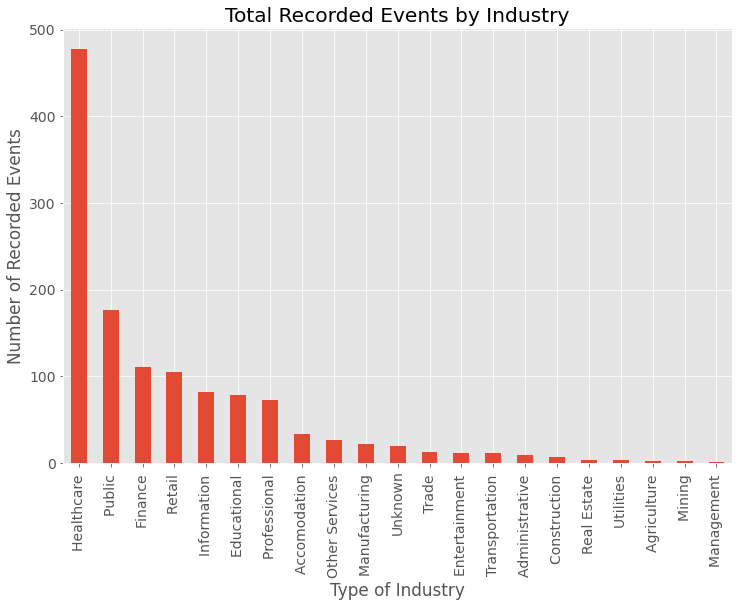

In [18]:
# Total Incidents by Industry in the US
df_us['victim.industry.name'].value_counts().plot(kind='bar')
plt.title("Total Recorded Events by Industry")
plt.xlabel("Type of Industry")
plt.ylabel("Number of Recorded Events")